# Stock Price Prediction Model - "Machine Learning" /                                "Artificial Intelligence"
## Price Prediction \\ AI/  Machine learning

**Data Handeling \ wrangling \ Manuplating** 

- By: **Ertiza Abbas**                             \\   April 20th - 2022
- Location : $Singapore$

-  Related libraries

In [56]:
# pip install mplfinance

In [57]:
import math
import pandas as pd 
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import scipy as sc 
import numpy as np
import datetime as dt
import mplfinance as mpf
plt.style.use('fivethirtyeight')
import tensorflow as tf
# %matplotlib notebook 

In [58]:
# !pip install gdown
# !pip install tensorflow-gpu

### * Loading Data from Yahoo finance 

In [59]:
# company =  '^IXIC'    # NASDAQ Futures
# company = '^GSPC'     # S&P500
# company =  'FB'      # Facebook
company =  '^DJI'    # Dow Jones   
# company = 'GC=F'     # Gold/USD
# company =  'AAPL'    # Apple
# company = 'CL=F'     #crude oil 
# company = 'ETH-USD'    #Etheruem
# company ='EURUSD=X'  #EURUSD
# compnay = 'PKRUSD=X'    #USD/PAK
# company = 'GBPJPY=X' #GBPJPY
# company = 'JPY=X'    #USDJPY
# company = 'PAK'      #Global X 
# company = '^STI'     #Singapore index



start = dt.datetime(2012,4,1)
end = dt.datetime.now()

data = web.DataReader(company, 'yahoo', start, end)

In [60]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-02,13297.110352,13153.690430,13211.360352,13264.490234,108790000,13264.490234
2012-04-03,13265.360352,13131.209961,13258.959961,13199.549805,123980000,13199.549805
2012-04-04,13198.190430,13020.860352,13198.190430,13074.750000,125000000,13074.750000
2012-04-05,13088.110352,13012.459961,13067.179688,13060.139648,109530000,13060.139648
2012-04-09,13057.719727,12903.780273,13057.570312,12929.589844,105580000,12929.589844
...,...,...,...,...,...,...
2022-06-16,30305.740234,29740.349609,30305.740234,29927.070312,442910000,29927.070312
2022-06-17,30167.519531,29653.289062,29912.699219,29888.779297,692830000,29888.779297
2022-06-21,30653.980469,30074.689453,30074.689453,30530.250000,376900000,30530.250000


In [61]:
# data.dtypes

In [62]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2574.000000,2574.000000,2574.000000,2574.000000,2.574000e+03,2574.000000
mean,22338.350120,22098.238980,22221.747241,22224.776103,2.372125e+08,22224.776103
std,6692.129511,6604.725914,6650.715332,6648.600999,1.453982e+08,6648.600999
min,12143.690430,12035.089844,12101.080078,12101.459961,3.364000e+07,12101.459961
25%,16870.040527,16716.491699,16805.594727,16806.180176,1.044950e+08,16806.180176
50%,20995.449219,20894.860352,20952.460938,20950.785156,2.372250e+08,20950.785156
75%,26668.949707,26426.785156,26540.955078,26552.848145,3.344025e+08,26552.848145
max,36952.648438,36636.000000,36722.601562,36799.648438,9.159900e+08,36799.648438


In [63]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-16,30305.740234,29740.349609,30305.740234,29927.070312,442910000,29927.070312
2022-06-17,30167.519531,29653.289062,29912.699219,29888.779297,692830000,29888.779297
2022-06-21,30653.980469,30074.689453,30074.689453,30530.250000,376900000,30530.250000
2022-06-22,30777.919922,30166.009766,30352.570312,30483.130859,343490000,30483.130859
2022-06-23,30715.630859,30529.259766,30570.330078,30668.580078,91841201,30668.580078


In [64]:
data.describe

<bound method NDFrame.describe of                     High           Low          Open         Close     Volume  \
Date                                                                            
2012-04-02  13297.110352  13153.690430  13211.360352  13264.490234  108790000   
2012-04-03  13265.360352  13131.209961  13258.959961  13199.549805  123980000   
2012-04-04  13198.190430  13020.860352  13198.190430  13074.750000  125000000   
2012-04-05  13088.110352  13012.459961  13067.179688  13060.139648  109530000   
2012-04-09  13057.719727  12903.780273  13057.570312  12929.589844  105580000   
...                  ...           ...           ...           ...        ...   
2022-06-16  30305.740234  29740.349609  30305.740234  29927.070312  442910000   
2022-06-17  30167.519531  29653.289062  29912.699219  29888.779297  692830000   
2022-06-21  30653.980469  30074.689453  30074.689453  30530.250000  376900000   
2022-06-22  30777.919922  30166.009766  30352.570312  30483.130859  3434900

In [65]:
data.shape
print(data.shape,'Data appeared as it is as appeared in above table data frame, via yahoo finance pd data reader')

(2574, 6) Data appeared as it is as appeared in above table data frame, via yahoo finance pd data reader


### Plotting / visualizing closing price and open price


<IPython.core.display.Javascript object>


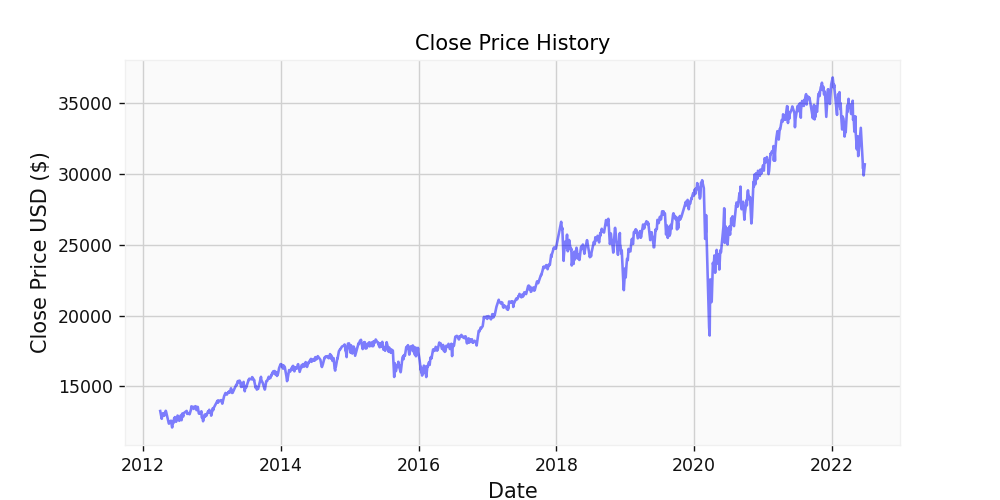

<function matplotlib.pyplot.show(block=None)>

In [97]:

plt.figure(figsize=(8,4))
plt.title('Close Price History')
# plt.plot(data['Open'], color= 'red', alpha=2)
plt.plot(data['Adj Close'], color= 'b', alpha= 0.5)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Close Price USD ($)', fontsize= 12)
plt.show

<IPython.core.display.Javascript object>


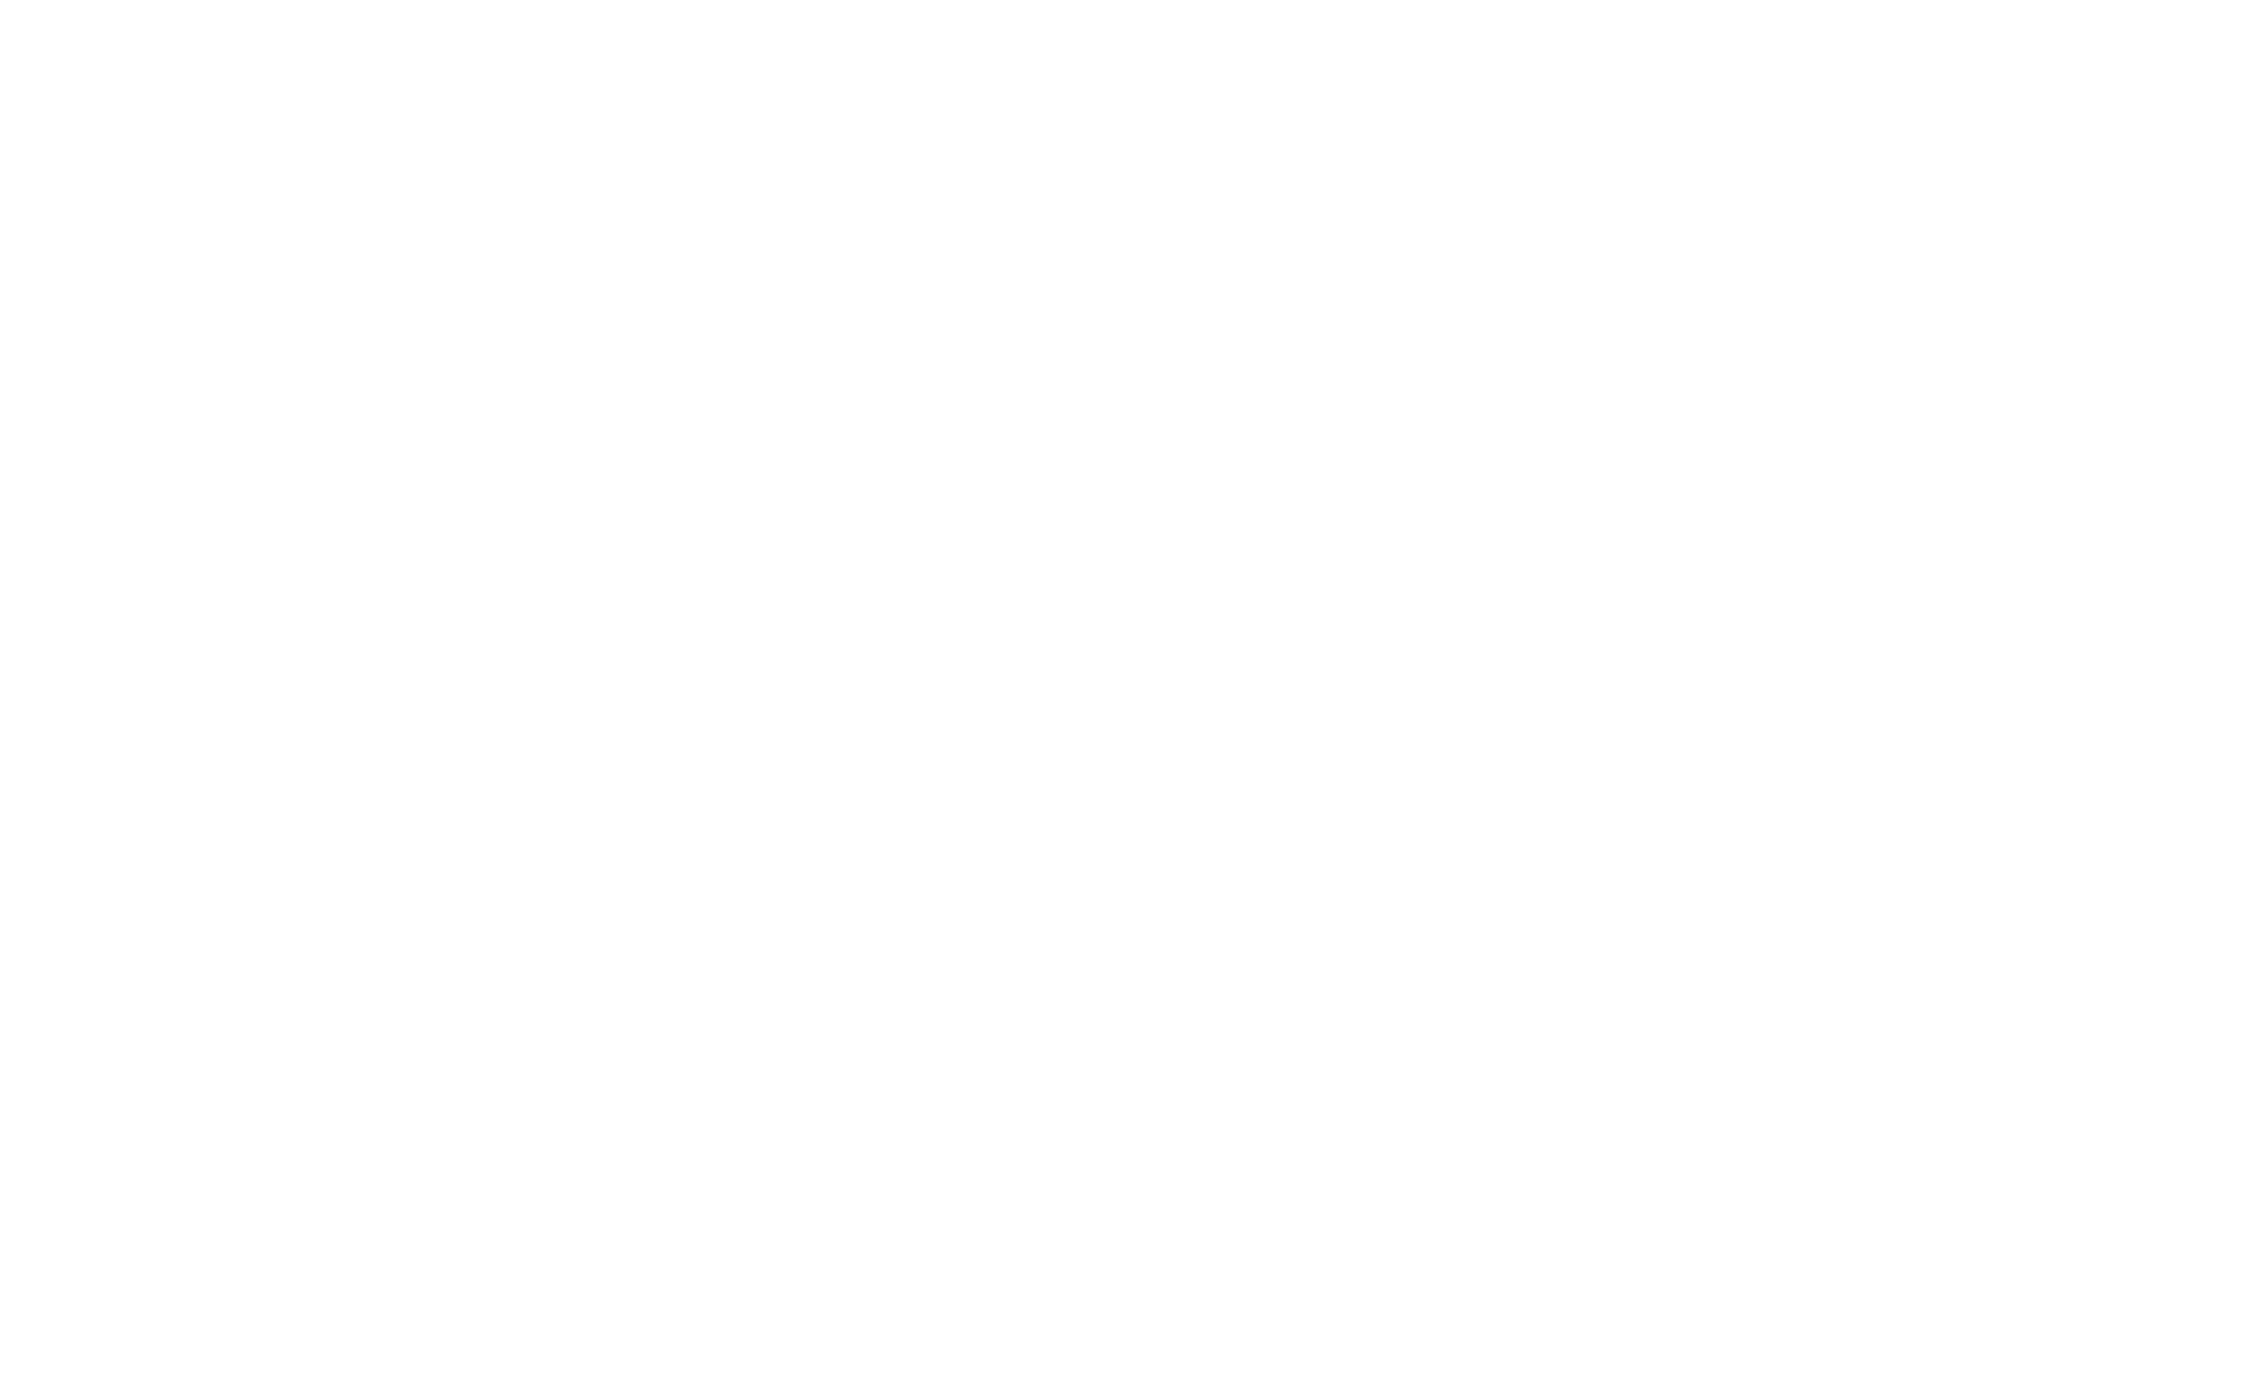

C:\Users\user\.conda\envs\tesnsorflow\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


<IPython.core.display.Javascript object>


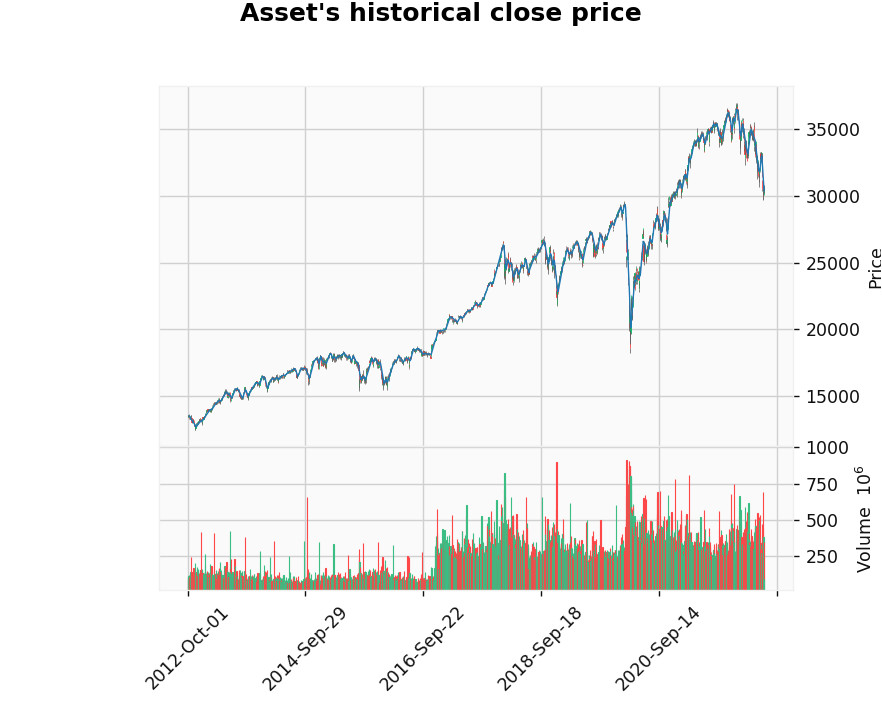

In [96]:

plt.figure(figsize= (18,11))
mpf.plot(data['2012-10-01':], figratio = (20,12), type = 'candle',
         title = "Asset's historical close price",
         mav =(8), volume= True,
                style = 'yahoo')

### Creating new data frame with only 'Close' column

In [68]:
asset = data.filter(['Close'])

### convert the DataFrame to a numpy array

In [69]:
dataset = asset.values

In [70]:
# fb
# asset

In [71]:
asset = asset.filter(['Close'])
### convert the DataFrame to a numpy array

dataset = asset.values

In [72]:
## Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2060

### Scaling Data

In [73]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_data = scaler.fit_transform(dataset)

In [74]:
# let's check our Data

scaled_data

array([[0.0470897 ],
       [0.04446034],
       [0.03940735],
       ...,
       [0.74615958],
       [0.74425179],
       [0.7517604 ]])

### Getting the number of rows to train the model- Stock / Indicies / crypto / fx_pairs

#### Prepare Data 

In [75]:
train_data = scaled_data[0: training_data_len, :]

### Split the Data into x_train and y_train dataset

x_train = []
y_train = []

In [76]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Now let's defined how many days need to look back to predict the future price 

prediction_days = 60

# creating two empty lists for data training purpose 
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])
    
    if i<= 60:
        print(x_train)
        print(y_train)
        print()


[array([0.0470897 , 0.04446034, 0.03940735, 0.03881579, 0.03352998,
       0.02487914, 0.02850127, 0.03583745, 0.03029088, 0.0331988 ,
       0.04105888, 0.03770682, 0.03492724, 0.0375655 , 0.03343201,
       0.03644395, 0.04005394, 0.04466563, 0.04562479, 0.04503042,
       0.04769015, 0.0472549 , 0.04474538, 0.03793029, 0.03672619,
       0.03363121, 0.02970257, 0.03051155, 0.0291171 , 0.02404588,
       0.02148093, 0.02012657, 0.01380791, 0.01084776, 0.01631782,
       0.01625016, 0.01598054, 0.01734095, 0.01430753, 0.01940347,
       0.01289165, 0.01182233, 0.00069278, 0.        , 0.00107256,
       0.01268636, 0.01455572, 0.01833091, 0.01254224, 0.01912447,
       0.01598983, 0.02228707, 0.0269538 , 0.02592742, 0.0297945 ,
       0.02927056, 0.01911518, 0.02183643, 0.01624411, 0.01754015])]
[0.021278880642854603]



### Coverting the x_train and y_train into numpy arrays

In [77]:
x_train, y_train = np.array(x_train), np.array(y_train)

### Creating function for decision tree

### Reshaping data

-LSTM Modeling need 3 deimensional data while right now our data is 2 dimensional *Lets check dimension of our data


In [78]:
x_train.shape             # it is two (2) dimensional data  'number of row [4232]', 'number of columns [60]'

(2000, 60)

In [79]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape               # Now our data is three (3) dimensional data

(2000, 60, 1)

### Building the Model LSTM [Long Short Term Memory]

In [80]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

####  Compiling the Model


In [81]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

## Training the Model


In [82]:
model.fit(x_train, y_train, batch_size=24, epochs=200)

Epoch 1/200
84/84 [==============================] - 5s 19ms/step - loss: 0.0041
Epoch 2/200
84/84 [==============================] - 2s 19ms/step - loss: 4.5537e-04
Epoch 3/200
84/84 [==============================] - 2s 19ms/step - loss: 4.1931e-04
Epoch 4/200
84/84 [==============================] - 2s 19ms/step - loss: 3.9284e-04
Epoch 5/200
84/84 [==============================] - 2s 19ms/step - loss: 3.6120e-04
Epoch 6/200
84/84 [==============================] - 2s 19ms/step - loss: 3.5597e-04
Epoch 7/200
84/84 [==============================] - 2s 19ms/step - loss: 3.1124e-04
Epoch 8/200
84/84 [==============================] - 2s 20ms/step - loss: 3.2725e-04
Epoch 9/200
84/84 [==============================] - 2s 19ms/step - loss: 2.9835e-04
Epoch 10/200
84/84 [==============================] - 2s 19ms/step - loss: 2.4025e-04
Epoch 11/200
84/84 [==============================] - 2s 19ms/step - loss: 2.3221e-04
Epoch 12/200
84/84 [==============================] - 2s 19ms/step 

84/84 [==============================] - 2s 19ms/step - loss: 1.0911e-04
Epoch 97/200
84/84 [==============================] - 2s 20ms/step - loss: 9.9695e-05
Epoch 98/200
84/84 [==============================] - 2s 20ms/step - loss: 9.3771e-05
Epoch 99/200
84/84 [==============================] - 2s 20ms/step - loss: 1.0866e-04
Epoch 100/200
84/84 [==============================] - 2s 20ms/step - loss: 1.2447e-04
Epoch 101/200
84/84 [==============================] - 2s 20ms/step - loss: 1.0867e-04
Epoch 102/200
84/84 [==============================] - 2s 20ms/step - loss: 1.0061e-04
Epoch 103/200
84/84 [==============================] - 2s 20ms/step - loss: 1.0524e-04
Epoch 104/200
84/84 [==============================] - 2s 22ms/step - loss: 1.1251e-04
Epoch 105/200
84/84 [==============================] - 2s 20ms/step - loss: 1.2184e-04
Epoch 106/200
84/84 [==============================] - 2s 21ms/step - loss: 1.0256e-04
Epoch 107/200
84/84 [==============================] - 2s 20

84/84 [==============================] - 2s 19ms/step - loss: 1.0308e-04
Epoch 191/200
84/84 [==============================] - 2s 19ms/step - loss: 9.8768e-05
Epoch 192/200
84/84 [==============================] - 2s 19ms/step - loss: 9.7236e-05
Epoch 193/200
84/84 [==============================] - 2s 19ms/step - loss: 9.9036e-05
Epoch 194/200
84/84 [==============================] - 2s 20ms/step - loss: 1.0400e-04
Epoch 195/200
84/84 [==============================] - 2s 19ms/step - loss: 9.4690e-05
Epoch 196/200
84/84 [==============================] - 2s 19ms/step - loss: 1.0066e-04
Epoch 197/200
84/84 [==============================] - 2s 20ms/step - loss: 1.0791e-04
Epoch 198/200
84/84 [==============================] - 2s 20ms/step - loss: 9.5603e-05
Epoch 199/200
84/84 [==============================] - 2s 19ms/step - loss: 1.1132e-04
Epoch 200/200
84/84 [==============================] - 2s 20ms/step - loss: 8.9223e-05


### Creating the testing dataset


* Creating new array containig Scales values, from index 2116 to 2889 (* 2889 is out end of Data)

In [83]:
test_data = scaled_data[training_data_len - 60:, :]

# Creating the datasets for x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])

### Coverting the data into numpy array


In [84]:
x_test = np.array(x_test)
x_test.shape  # again our data is two (2) dimensional data 

(514, 60)

### Reshaping the data to three (3) dimension for LSTM modeling

In [85]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape   # now we have reshaped the data into three (3) dimension

(514, 60, 1)

#### let's get the models prediected values



In [86]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

### Get the Root Mean Squared Error (RMSE)

In [87]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

504.041015625

### Plotting the Data

C:\Users\user\AppData\Local\Temp\ipykernel_20968\3964309378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid ['Predictions'] = predictions


<IPython.core.display.Javascript object>


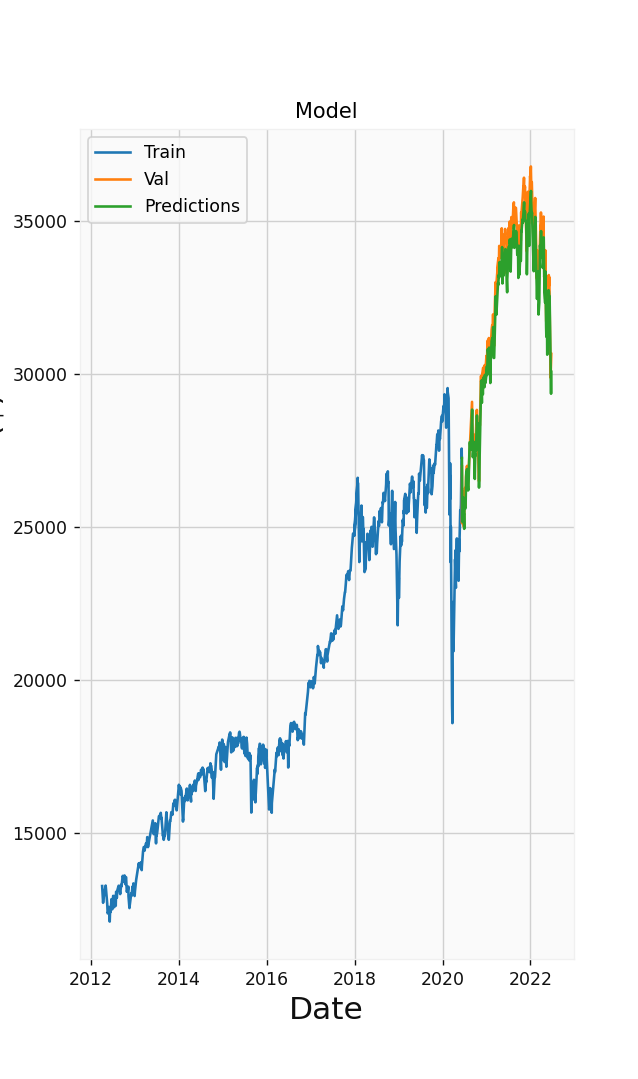

In [88]:
train = data[: training_data_len]
valid = data[training_data_len :]
valid ['Predictions'] = predictions

# visualizing data 
plt.figure(figsize= (18,9))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'best')
plt.show()

## Show the valid and predicted prices

In [89]:
valid

,High,Low,Open,Close,Volume,Adj Close,Predictions
Date,,,,,,,
2020-06-10,27355.220703,26938.050781,27251.890625,26989.990234,448930000,26989.990234,27263.541016
2020-06-11,26294.080078,25082.720703,26282.509766,25128.169922,647780000,25128.169922,26851.400391
2020-06-12,25965.550781,25078.410156,25659.419922,25605.539062,514440000,25605.539062,25177.818359
2020-06-15,25891.580078,24843.179688,25270.390625,25763.160156,461230000,25763.160156,25167.455078
2020-06-16,26611.029297,25811.699219,26326.679688,26289.980469,489500000,26289.980469,25639.658203
...,...,...,...,...,...,...,...
2022-06-16,30305.740234,29740.349609,30305.740234,29927.070312,442910000,29927.070312,30184.437500
2022-06-17,30167.519531,29653.289062,29912.699219,29888.779297,692830000,29888.779297,29660.812500
2022-06-21,30653.980469,30074.689453,30074.689453,30530.250000,376900000,30530.250000,29365.751953


## Get the asset quote

In [90]:
asset_quote = web.DataReader('^DJI', data_source= 'yahoo', start= '2010-04-02')

# Creat a new datafram

new_df = asset_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the DataFrame into numpy array

last_60_days = new_df[-60 :].values

# Scaled the data to be values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

In [91]:
# CREAT an Empty list

X_test = []

# Append the past 60 days

X_test.append(last_60_days_scaled)

# Convert the X_test dataset into numpy array

X_test = np.array(X_test)

# X_test

In [92]:
# Reshape the Data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [93]:
# Get the predicted scaled price

pred_price = model.predict(X_test)

# Undo The Scaling 

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[4680.2246]]


In [94]:
real = 29888.779297
accuracy = pred_price[0][0]/real
print(f"""{pred_price[0][0]} equals of {pred_price[0][0]} == pred_price
Test Accuracy is {accuracy} """)

4680.224609375 equals of 4680.224609375 == pred_price
Test Accuracy is 0.15658801461472746 


In [95]:
asset_quote2 = web.DataReader('^DJI', data_source= 'yahoo', start= '2010-10-02')

print(asset_quote2['Close'])

Date
2012-10-01    1444.489990
2012-10-02    1445.750000
2012-10-03    1450.989990
2012-10-04    1461.400024
2012-10-05    1460.930054
                 ...     
2022-06-16    3666.770020
2022-06-17    3674.840088
2022-06-21    3764.790039
2022-06-22    3759.889893
2022-06-23    3786.469971
Name: Close, Length: 2448, dtype: float64


#### Notes: 
algo trading predictions are not very sure and precise, traders needs to connect the dots according to market conditions in light of fundamentals and especially technincal analysis, price action still mother of all indictor and predictions. 

$Sincerely$: ***Ertiza Abbas***